In [43]:
import matplotlib.pyplot as plt
import numpy as np

from pylab import rcParams

rcParams['figure.figsize'] = 12,8
plt.rcParams["font.size"] = 18

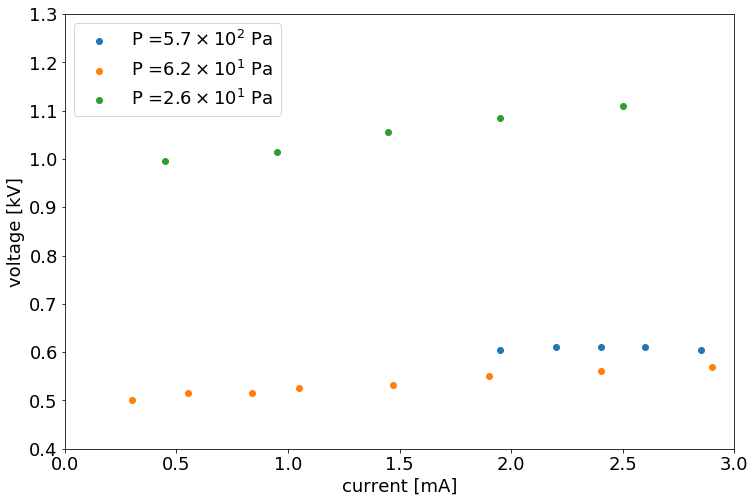

In [44]:
# グロー放電
## ダイオード特性 DC Plus

P0 = 1001 * 100 #Pa
T0 = 21 # ℃
R = 100e3 # Ω

# 5.7e2 Pa
glow1 = np.array([
    # V [kV], I [mA], P
    [0.80 , 1.95],
    [0.83, 2.20],
    [0.85, 2.40],
    [0.87, 2.6],
    [0.89, 2.85]
])

glow1[:,0] *= 1e3
glow1[:,1] *= 1e-3
glow1[:, 0] -= R * glow1[:, 1]

# 6.2e1 Pa
glow2 = np.array([
    [0.53, 0.3],
    [0.57, 0.55],
    [0.60, 0.84],
    [0.63, 1.05],
    [0.68, 1.47],
    [0.74, 1.90],
    [0.80, 2.40],
    [0.86, 2.9]
])
glow2[:,0] *= 1e3
glow2[:,1] *= 1e-3
glow2[:,0] -= R * glow2[:, 1]

# 2.6e1 Pa
glow3 = np.array([
    [1.04, 0.45],
    [1.11, 0.95],
    [1.20, 1.45],
    [1.28, 1.95],
    [1.36, 2.5]
])
glow3[:,0] *= 1e3
glow3[:,1] *= 1e-3
glow3[:,0] -= R * glow3[:, 1]

plt.ylim(0.4, 1.3)
plt.xlim(0, 3)
plt.xlabel("current [mA]")
plt.ylabel("voltage [kV]")
plt.scatter(glow1[:, 1] * 1e3, glow1[:, 0] * 1e-3, label="P =$5.7\\times10^2\ \mathrm{Pa}$") 
plt.scatter(glow2[:, 1] * 1e3, glow2[:, 0] * 1e-3, label="P =$6.2\\times10^1\ \mathrm{Pa}$") 
plt.scatter(glow3[:, 1] * 1e3, glow3[:, 0] * 1e-3, label="P =$2.6\\times10^1\ \mathrm{Pa}$") 

plt.legend()

[ 277.494  554.988  832.482 1109.976 1387.47  5549.88  8324.82 ]


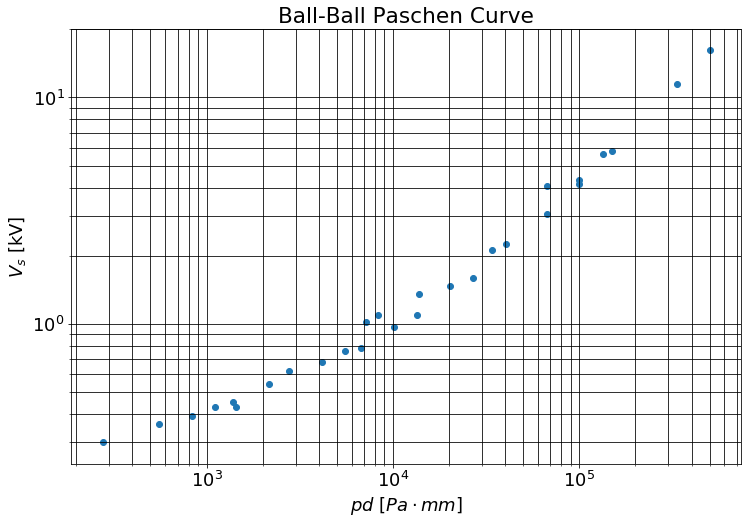

In [51]:
# 球-球

def cmHg2pa(v):
    return 1333.22 * v

hibana = np.array([
    # dp[cmHg] , d[mm], Vs[kV]
    [0, 1, 4.16],
    [25, 1, 3.05],
    [55, 1, 1.60],
    [65, 1, 1.09],
    [70, 1, 0.78],
    [73, 1, 0.62],
    [74, 1, 0.43],
    
    [74, 1.5, 0.54],
    [73, 1.5, 0.68],
    [70, 1.5, 0.97],
    [65, 1.5, 1.47],
    [55, 1.5, 2.25],
    [25, 1.5, 4.3],
    [0, 1.5, 5.83],
    
    [0, 5, 16.16],
    [25, 5, 11.46],
    [55, 5, 5.61],
    [65, 5, 4.07],
    [70, 5, 2.13],
    [73, 5, 1.36],
    [74, 5, 1.02]
])
hibana[:, 0] = P0 - cmHg2pa(hibana[:, 0])

hibana2 = np.array([
    # p [Pa], d [mm], Vs[kV]
    
    [4.8e2, 1, 0.37],
    [1.9e2, 1, 0.43],
    [9.6e1, 1, 0.52],
    [4.5e1, 1, 0.62]
])
#hibana = np.concatenate([hibana, hibana2])

hibana3 = np.array([
    # dp[cmHg], d [mm], Vs [kV]
    [73, 0.1, 0.30],
    [73, 0.2, 0.36],
    [73, 0.3, 0.39],
    [73, 0.4, 0.43],
    [73, 0.5, 0.45],
    [73, 2.0, 0.76],
    [73, 3.0, 1.09],
])
hibana3[:, 0] = P0 - cmHg2pa(hibana3[:, 0])
print(hibana3[:, 0] * hibana3[:, 1])
hibana = np.concatenate([hibana, hibana3])

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$pd\ [Pa \cdot mm]$")
plt.ylabel("$V_s\ [\mathrm{kV}]$")
plt.title("Ball-Ball Paschen Curve")
plt.grid(which='major',color='black',linestyle='-')
plt.grid(which='minor',color='black',linestyle='-')
plt.scatter(hibana[:, 0] * hibana[:, 1], hibana[:, 2])

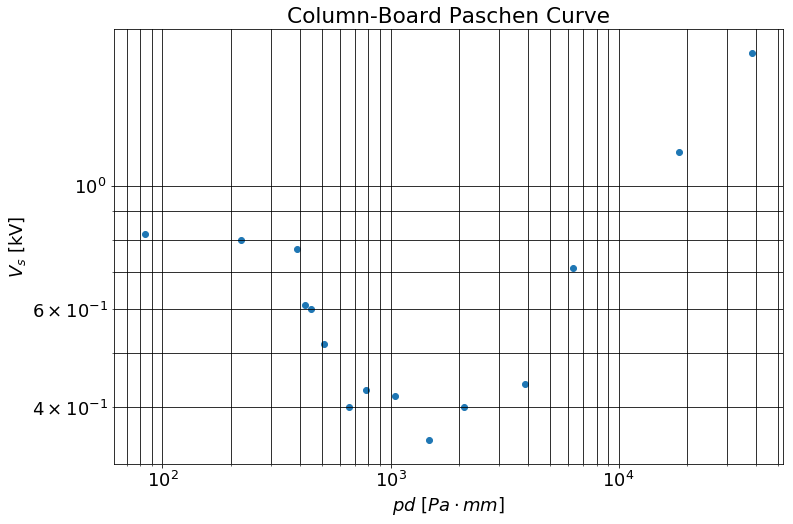

In [52]:
# 被覆円柱 - 平板電極

P0 = 1001 * 100 #Pa
T0 = 21 # ℃
R = 100e3 # Ωt

column_board = np.array([
    # p[Pa], d [mm], Vs [kV]
    [P0 - cmHg2pa(65.5), 3, 1.73],
    [P0 - cmHg2pa(70.5), 3, 1.15],
    [P0 - cmHg2pa(73.5), 3, 0.71],
    [1.3e3, 3, 0.44],
    [7.0e2, 3, 0.40],
    [2.6e2, 3, 0.43],
    [1.3e2, 3, 0.77],
    [7.4e1, 3, 0.80],
    [2.8e1, 3, 0.82],
    [2.2e2, 3, 0.40],
    [1.4e2, 3, 0.61],
    [1.5e2, 3, 0.60],
    [1.7e2, 3, 0.52],
    [3.5e2, 3, 0.42],
    [4.9e2, 3, 0.35]
])


plt.xscale("log")
plt.yscale("log")
plt.xlabel("$pd\ [Pa \cdot mm]$")
plt.ylabel("$V_s\ [\mathrm{kV}]$")
plt.title("Column-Board Paschen Curve")
plt.grid(which='major',color='black',linestyle='-')
plt.grid(which='minor',color='black',linestyle='-')
plt.scatter(column_board[:, 0] * column_board[:, 1], column_board[:, 2])

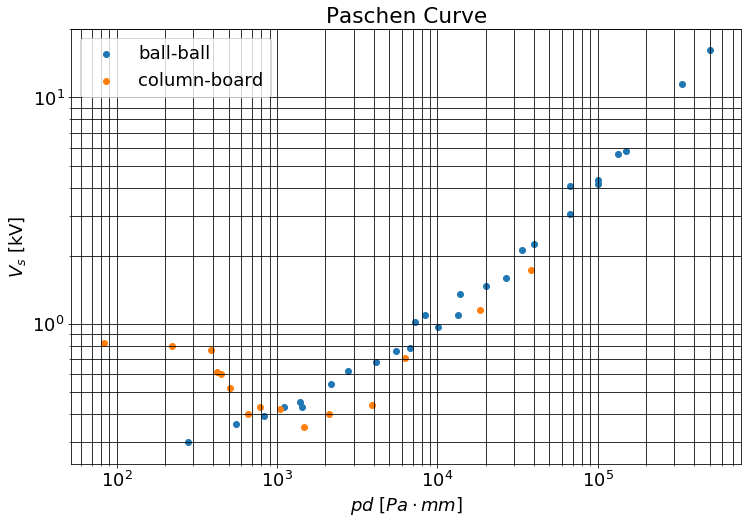

In [53]:
#fig = plt.figure(figsize=(12, 8))

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$pd\ [Pa \cdot mm]$")
plt.ylabel("$V_s\ [\mathrm{kV}]$")
plt.title("Paschen Curve")

plt.scatter(hibana[:, 0] * hibana[:, 1], hibana[:, 2], label="ball-ball")
plt.scatter(column_board[:, 0] * column_board[:, 1], column_board[:, 2], label="column-board")
plt.legend()
plt.grid(which='major',color='black',linestyle='-')
plt.grid(which='minor',color='black',linestyle='-')